## Stacking (Stacked Generalization)

Stacking is a type of ensemble technique which combines the predictions of two or more models, also called base models, and use the combination as the input for a new model (meta-model) i.e. a new model is trained on the predictions of the base models. 

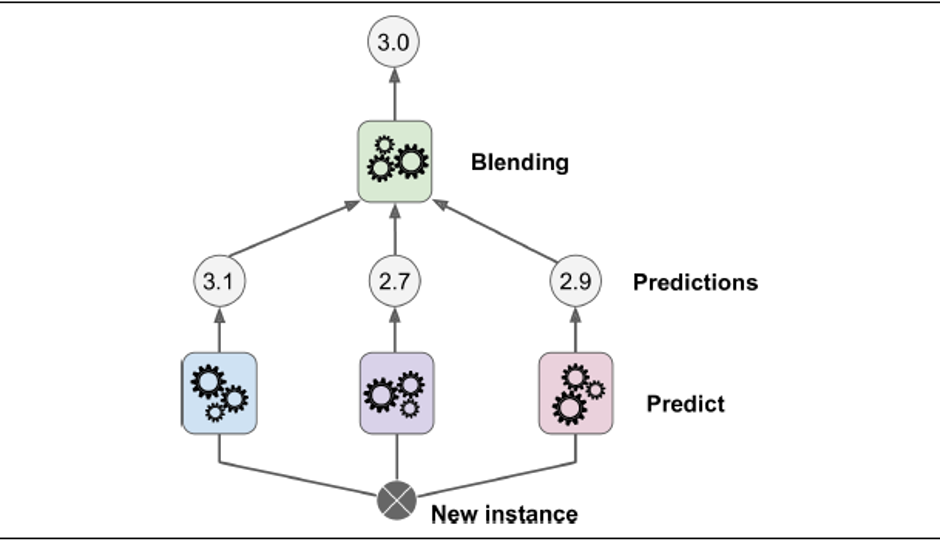

In [1]:
from IPython.display import Image
Image('stacking.PNG', width='700')

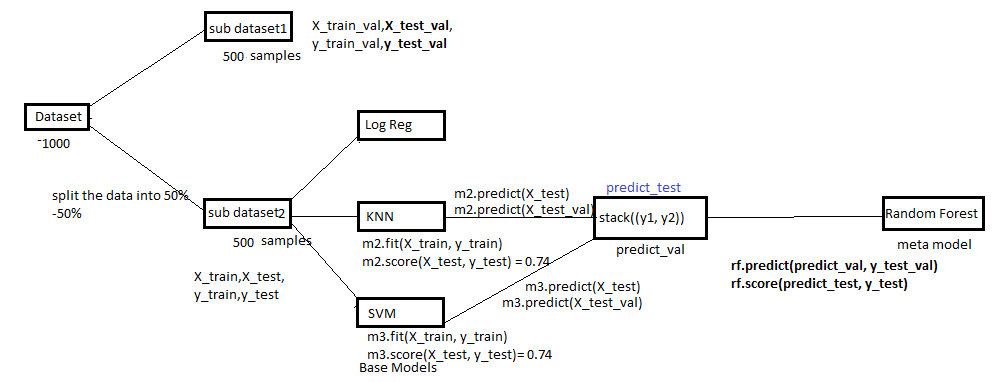

In [2]:
from IPython.display import Image
Image('stack.PNG')

Suppose you have a classification problem and you can use several models like logistic regression, SVM, KNN, Random forest etc. The idea is to use few models like KNN, SVM as the base model and make predictions using these models. Now the predictions made by these models are used as an input feature for Random forest to train on and give prediction.


Stacking, just like other ensemble techniques, tries to improve the accuracy of a model by using predictions of not so good models and then using those predictions as an input feature for a better model.

Stacking can be multilevel e.g. using base models as level 1 then passing the predictions into another set of sub-base models at level 2 and so on. Then at the end using meta-model/models which take predictions of the last sub base models as input and does prediction.

Let's understand more by looking at the steps involved for stacking:

*	Split the dataset into a training set and a holdout set. We can use k-fold validation for seleting different set of validation sets.

   Generally, we do a 50-50 split of the training set and the hold out set. 
   
   training set = x1,y1
   hold out set = x2, y2

*	Split the training set again into training and test dataset e.g. x1_train, y1_train, x1_test, y1_test

*	Train all the base models on training set  x1_train, y1_train.

*	After training is done, get the predictions of all the base models on the validation set x2. 

*	Stack all these predictions together (you can also take an average of all the predictions or probability prediction) as it will be used as input feature for the meta_model.

*	Again, get the prediction for all the base models on the test set i.e. x1_test 

*	Again, stack all these predictions together (you can also take an average of all the predictions or probability prediction) as it will be used as the prediction dataset for the meta_model.

*	Use the stacked data from step 5 as the input feature for meta_model and validation set y2 as the target variable and train the model on these data.

*	Once, the training is done check the accuracy of meta_model by using data from step 7 for prediction and y1_test for evaluation.

Although, there is no libraries available in Sklearn for stacking, it can still be implemented.

Let's understand more about stacking with python implementation:

In [6]:
import pandas as pd

df = pd.read_csv("winequality_red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Let's use the same dataset used above for Random forest classification and try to improve the accuracy more using stacking.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
X = df.iloc[:,:-1].values  # X = data.drop(columns = 'Outcome')
y = df.iloc[:,-1].values   # y = data['Outcome']

In [13]:
# let's divide our dataset into training set and hold out set by 50%
from sklearn.model_selection import train_test_split

#train, val_train, test, val_test
X_train_val,X_test_val,y_train_val,y_test_val = train_test_split(X,y,test_size=0.5, random_state= 355)

In [14]:
print(len(X_train_val))
print(len(X_test_val))

384
384


In [16]:
# let's split the training set again into training and test dataset 
X_train,X_test,y_train,y_test =  train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.2,
                                                  random_state= 355)

In [9]:
print(len(X_train))
print(len(X_test))

307
77


We will use KNN and SVM algorithm as our base models.

Let's fit both of the models first on the x_train and y_train data.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.7402597402597403

In [18]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

0.7402597402597403

In [19]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7662337662337663

Let's get the predictions of all the base models on the Test set x_test.

In [21]:
predict_test1 = knn_model.predict(X_test)
predict_test2 = svc_model.predict(X_test)
predict_test3 = lr_model.predict(X_test)

Let's stack the prediciton values for validation set together as "predict_test"

In [22]:
import numpy as np

predict_test = np.column_stack((predict_test1, predict_test2,predict_test3))

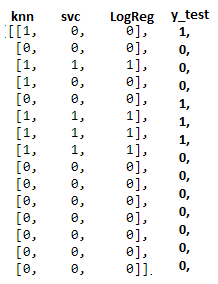

In [23]:
from IPython.display import Image
Image('stack2.PNG')

Let's get the predictions of all the base models on the validation set val_train.

In [24]:
predict_val1 = knn_model.predict(X_test_val)
predict_val2 = svc_model.predict(X_test_val)
predict_val3 = lr_model.predict(X_test_val)

Let's stack the prediciton values for validation set together as "predict_val"

In [25]:
import numpy as np

predict_val = np.column_stack((predict_val1, predict_val2, predict_val3))

Let's use the Use the stacked data "predict_val" and val_test as the input feature for meta_model i.e. randomforest classifier

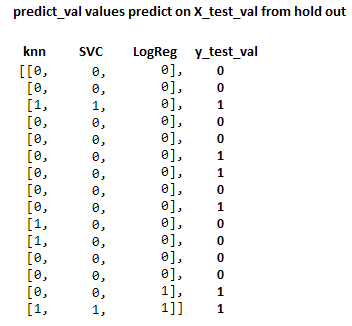

In [59]:
from IPython.display import Image
Image('stack1.PNG')

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(predict_val, y_test_val)

RandomForestClassifier()

Let's check the accuracy of our meta_model using predict_test and y_test.

In [27]:
rf_model.score(predict_test, y_test)

0.7532467532467533

In [28]:
y_pred_test = rf_model.predict(predict_test)

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_test)

0.7532467532467533

In [32]:
# we are tuning three hyperparameters right now, 
# we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [33]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_model,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [34]:
#grid_search.fit(predict_val,val_test)
grid_search.fit(predict_val, y_test_val)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  3.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [90, 100, 115]},
             verbose=3)

In [35]:
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [36]:
final_model = RandomForestClassifier( criterion='gini',
                                     max_features ='auto',
                                     min_samples_leaf =3,
                                     min_samples_split= 8,
                                     n_estimators =100)

In [39]:
final_model.fit(predict_val, y_test_val)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=8)

In [40]:
final_model.score(predict_test, y_test)

0.7662337662337663

In [41]:
import pickle

filename = "stack_final_model.pkl"
pickle.dump(final_model, open(filename, "wb"))

In [42]:
loaded = pickle.load(open("stack_final_model.pkl",'rb'))
loaded.predict([[1,1,0]])

array([0], dtype=int64)